# Constrained Least Squares Problem

## Part (a):

In [ ]:
np.random.seed(1)

In [ ]:
N = 150
sigma = 0.1
E = sigma**2 * np.random.randn(N)

x = np.random.uniform(-1.5, 1.5, N)
x = np.sort(x)

y = x*(np.exp(-x**2) + np.cos(6*x)) + E

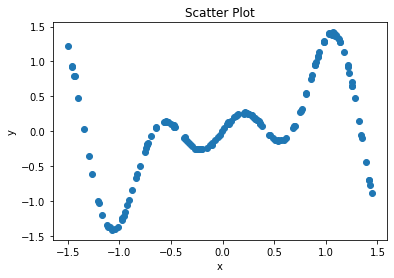

In [ ]:
# Creating a scatter plot:
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Part (b):

Requirements of Continuity:

The following is a set of conditions such that the piecewise defined function is continuous and has a continuous first derivative throughout defiend interval and has a continuous derivative at joining points:
$$p_1(-0.5) = p_2(-0.5)$$
$$p_2(0.5) = p_3(0.5)$$
$$and$$
$$p_{1}'(-0.5) = p_{2}'(-0.5)$$
$$p_{2}'(0.5) = p_{3}'(0.5)$$
$$and$$
$$p_{1}''(-0.5) = p_{2}''(-0.5)$$
$$p_{2}''(0.5) = p_{3}''(0.5)$$

The constrained least squares problem can also be thought of as a limit of a biobjective
least squares problem, with primary objective $\| Ax - b \|^2 $ and secondary
objective $\| Cx - d \|^2 $. Roughly speaking, we put infinite weight on the second
objective, so that any nonzero value is unacceptable (which forces $x$ to satisfy
$Cx = d$). 

We would expect that minimizing the weighted objective:
$$ \| Ax - b \|^2 + \lambda \| Cx - d \|^2 ,$$ 
for a very large value of $\lambda$ yields a vector close to a solution of the constrained least squares problem. 





The conditions:
$$p_1(-0.5) - p_2(-0.5) = 0$$
$$p_2(0.5) - p_3(0.5) = 0$$
$$and$$
$$p_{1}'(-0.5) - p_{2}'(-0.5) = 0$$
$$p_{2}'(0.5) - p_{3}'(0.5) = 0$$
$$and$$
$$p_{1}''(-0.5) - p_{2}''(-0.5) = 0$$
$$p_{2}''(0.5) - p_{3}''(0.5) = 0$$
are all linear equations.

## Part (c):


In [ ]:
def vandermonde(t,n):
    m = len(t)
    V = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j] = t[i]**(j)
    return V

In [ ]:
def cls_solve(A, b, C, d):
    m, n = A.shape
    p, n = C.shape
    Q, R = QR_factorization(np.vstack([A,C]))
    Q1 = Q[:m,:]
    Q2 = Q[m:m+p+1,:]
    Qtil, Rtil = QR_factorization(Q2.T)
    w = solve_via_backsub(Rtil, (2*Qtil.T @ (Q1.T @ b) - 2*solve_via_backsub(Rtil.T, d)))
    xhat = solve_via_backsub(R, (Q1.T @ b - Q2.T @ w/2))
    return xhat

In [ ]:
def cls_solve_kkt(A, b, C, d):
    m, n = A.shape
    p, n = C.shape
    #Gram matrix
    G = A.T @ A
    #KKT matrix
    KKT = np.vstack([np.hstack([2*G,C.T]), np.hstack([C, np.zeros((p,p))])])
    xzhat = solve_via_backsub(KKT, np.hstack([2*A.T @ b,d]))
    return xzhat[:n]

---

In [ ]:
M = 75
N = 2*M
xleft = x[0:75]
xright = x[75:]
x = np.hstack([xleft, xright])
y = x*(np.exp(-x**2) + np.cos(6*x)) + E
n = 4

A = np.vstack([np.hstack([vandermonde(xleft,n), np.zeros((M,n))]), np.hstack([np.zeros((M,n)), vandermonde(xright,n)])])
b = y
C = np.vstack((np.hstack([1,np.zeros(n-1), -1, np.zeros(n-1)]), np.hstack([0, 1, np.zeros(n-2), 0, -1, np.zeros(n-2)])))
d = np.zeros(2)


In [ ]:
print(A)

[[ 1.         -0.08239365  0.00678871 ...  0.          0.
   0.        ]
 [ 1.         -0.41163267  0.16944145 ...  0.          0.
   0.        ]
 [ 1.         -0.14480972  0.02096985 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.97867281  0.95780046
   0.93737326]
 [ 0.          0.          0.         ...  0.2363841   0.05587744
   0.01320854]
 [ 0.          0.          0.         ...  0.66059836  0.43639019
   0.28827864]]


In [ ]:
print(b)

[-0.13812154 -0.03140476 -0.24058987 -0.0649467  -0.24930419 -0.23215239
 -0.00616684 -0.87234948 -0.22647182  0.13495567 -0.83206908 -0.04845671
 -1.22998161 -0.49481395 -0.25376631 -1.30931433 -0.07685067 -1.28130111
 -0.00460757 -0.00834545 -0.11820147 -0.12393709  0.10696984  0.14067178
 -0.01540537 -0.21951645 -0.07035083  0.075544   -0.29501598 -0.01327131
 -0.20773118 -1.09702747 -0.06424678 -0.26277682 -0.27027094 -0.25363542
 -1.07038123  0.12418493  0.15385286 -0.16094656  0.13496829 -0.22010215
 -0.18917571 -0.18554137 -0.07845757 -0.73556712 -0.25632525 -0.24337131
 -0.17427368 -0.33187662 -0.60072554  0.10708363 -0.03619141 -0.2643624
 -0.07205918 -0.25200286  0.14396176 -0.96481814 -0.89932507  0.0964323
 -0.52856865 -0.24625114 -0.04012322 -0.19462082  0.11900957 -1.0250201
 -0.32104301  0.14855999 -0.47663535 -1.27430537 -0.25165063 -0.23817841
  0.00261838 -0.23638446  0.13894022  0.22950025  0.89912609  0.08394548
  0.21127258  0.15246292  0.26061806  0.20424323  0.67

In [ ]:
print(C)

[[ 1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.  0.]]


In [ ]:
print(d)

[0. 0.]


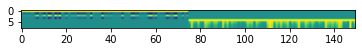

In [ ]:
# Plotting Heatmaps:
plt.imshow(A.T)
plt.show()

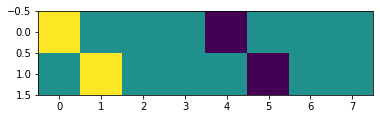

In [ ]:
plt.imshow(C)
plt.show()

## Part (d):

Vectors are linearly independent.
Vectors are linearly independent.
Vectors are linearly independent.
Vectors are linearly independent.
Vectors are linearly independent.


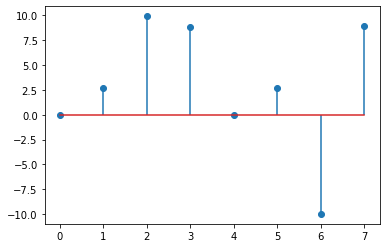

In [ ]:
theta = cls_solve(A,b,C,d)
plt.stem(theta)
plt.show()

## Part (e):

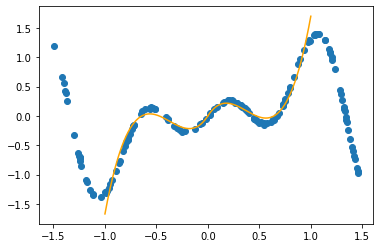

In [ ]:
plt.ion()

Npl = 200
xpl_left = np.linspace(-1, 0, Npl)
ypl_left = vandermonde(xpl_left, 4) @ theta[:n]
xpl_right = np.linspace(0, 1, Npl)
ypl_right = vandermonde(xpl_right, 4) @ theta[n:]
plt.scatter(x, y)
plt.plot(xpl_left, ypl_left, 'orange')
plt.plot(xpl_right, ypl_right, 'orange')
plt.show()
